# Step 1: Import Libraries

In [5]:
# Import standard libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

print("Setup Complete")

Setup Complete


# Step 2: Load the Dataset

In [6]:
# Load Dataset
data = pd.read_csv(
    "../Toronto_Repo/Opioid_Shelter.csv",
)

# Step 3: Review Data

In [7]:
# Display the first 5 rows
data.head()

,_id,location_name,address,year,year_stage,suspected_non_fatal_overdoses
0,1,45 The Esplanade,45 The Esplanade,2021,Q1,5
1,2,45 The Esplanade,45 The Esplanade,2021,Q2,14
2,3,45 The Esplanade,45 The Esplanade,2021,Q3,46
3,4,45 The Esplanade,45 The Esplanade,2021,Q4,33
4,5,45 The Esplanade,45 The Esplanade,2022,Q1,22


In [8]:
# Display frequency counts for each location name
data.value_counts()

_id   location_name                   address              year  year_stage  suspected_non_fatal_overdoses
1     45 The Esplanade                45 The Esplanade     2021  Q1          5                                1
692   SSHA Downtown Hotel Program     77 Ryerson Ave       2019  Q1          < 5                              1
677   SSHA Broadway Residences 2      65 Broadway Ave      2020  Q2          0                                1
678   SSHA Broadway Residences 2      65 Broadway Ave      2020  Q3          < 5                              1
680   SSHA Downsview Dells            1651 Sheppard Ave W  2018  Q1          < 5                              1
                                                                                                             ..
339   HFS Kennedy Rd Women's Shelter  702 Kennedy Rd       2021  Q4          0                                1
340   HFS Kennedy Rd Women's Shelter  702 Kennedy Rd       2022  Q1          < 5                             

# Step 4: Data Cleaning

In [9]:
# Create a copy of data into a new variable
df_opioid = data.copy()

# Remove all 0 and missing values
df_opioid = df_opioid.dropna()
df_opioid = df_opioid[df_opioid['suspected_non_fatal_overdoses'] != 0]

# Change values of [<5, < 5] into a value of 3
df_opioid['suspected_non_fatal_overdoses'] = df_opioid['suspected_non_fatal_overdoses'].replace(['< 5','<5'], 3)

# Check for any remaining nulls
df_opioid.isnull().sum()

_id                              0
location_name                    0
address                          0
year                             0
year_stage                       0
suspected_non_fatal_overdoses    0
dtype: int64

In [10]:
# Find all unique values in address
df_opioid['address'].unique().tolist()

# Selected shelters of interest
# ['69 Fraser Ave', '962 Bloor St W', '135 Sherbourne St', '45 The Esplanade']


['45 The Esplanade',
 '67 Adelaide St E',
 '43 Christie St',
 '445 Rexdale Blvd',
 '850 Bloor St W',
 '973 Lansdowne Ave',
 '14 Roncesvalles Ave',
 '616 Vaughan Rd',
 '55 Hallcrown Pl',
 '1677 Wilson Ave',
 '20 Gerrard St E',
 '21 Mcgill St',
 '351 Lake Shore Blvd E',
 '354 George St',
 '65 Dundas St E',
 '56 Yonge St',
 '310 Danforth Ave',
 '552 Adelaide St W',
 '2714 Danforth Ave',
 '349 George St',
 '156 Sixth St',
 '3962 Bloor St W',
 '4401 Jane St',
 '60 Brant St',
 '360 Lesmill Rd',
 '25 Canterbury Pl',
 '490 Sherbourne St',
 '1A Strachan Ave',
 '1161 Caledonia Rd',
 '86 Lombard St',
 '185 Yorkland Blvd',
 '412 Queen St E',
 '335 Jarvis St',
 '4117 Lawrence Ave E',
 "195 Princes' Blvd",
 '545 Lake Shore Blvd W',
 '60 York St',
 '702 Kennedy Rd',
 '101 Placer Ct',
 '3576 St Clair Ave E',
 '805A Wellington St W',
 '5800 Yonge St',
 '1322 Bloor St W',
 '422 Gilbert Ave',
 'Isolation/Recovery program address not reported.',
 '870 Queen St E',
 '150 Sherbourne St',
 '1076 Pape Ave',
 

In [11]:
# Search for [25 Charles St, 145 Queen St]
for i in df_opioid.index:
    addressRegex = re.compile(r'^25.*|145.*')
    mo = addressRegex.search(df_opioid['address'][i])
    if mo:
        print(f'Found {mo.group()}')

Found 25 Canterbury Pl
Found 25 Canterbury Pl
Found 25 Canterbury Pl
Found 25 Canterbury Pl
Found 25 Canterbury Pl
Found 25 Canterbury Pl
Found 25 Canterbury Pl
Found 25 Canterbury Pl
Found 25 Augusta Ave
Found 25 Augusta Ave
Found 25 Augusta Ave
Found 25 Augusta Ave
Found 25 Augusta Ave
Found 25 Augusta Ave
Found 25 Augusta Ave
Found 25 Augusta Ave
Found 25 Augusta Ave
Found 25 Mendelssohn St
Found 25 Mendelssohn St


In [12]:
# Change suspected_non_fatal_overdoses column into numeric
df_opioid['suspected_non_fatal_overdoses'] = pd.to_numeric(df_opioid['suspected_non_fatal_overdoses'])

In [13]:
# Print summary statistics
df_opioid.describe()

,_id,year,suspected_non_fatal_overdoses
count,672.000000,672.000000,672.000000
mean,510.778274,2020.072917,6.050595
std,293.254547,1.176919,8.684937
min,1.000000,2018.000000,0.000000
25%,262.750000,2019.000000,3.000000
50%,505.000000,2020.000000,3.000000
75%,774.250000,2021.000000,5.000000
max,1026.000000,2022.000000,56.000000


# Step 5: Plotting

# 1. First plot the overall yearly non-fatal overdoses from all location
# 2. Select specific locations and plot their quarterly non-fatal overdoses


In [14]:
# Function to groupby quarterly
def quarterly_od(data, year):
    overdose = data[data['year'] == year][['year_stage', 'suspected_non_fatal_overdoses']]
    return overdose.groupby(by=['year_stage'])['suspected_non_fatal_overdoses'].sum()

# Function to plot quarterly bar graph
def bar_graph(var, axs, title):
    return var.plot.bar(ax=axs, xlabel='Quarter', ylabel='Count', title=title)

# Function to select specific location
def select_location(data, location_name):
    return data[data.address.isin([location_name])][['year', 'year_stage', 'suspected_non_fatal_overdoses']]

# Function to create line plot
def plot_line(data, hue, ax):
    return sns.catplot(ax=ax,
                       x='year_stage',
                       y='suspected_non_fatal_overdoses',
                       hue=hue,
                       data=data, kind='bar')

[Text(0, 0, '407'),
 Text(0, 0, '695'),
 Text(0, 0, '956'),
 Text(0, 0, '1632'),
 Text(0, 0, '376')]

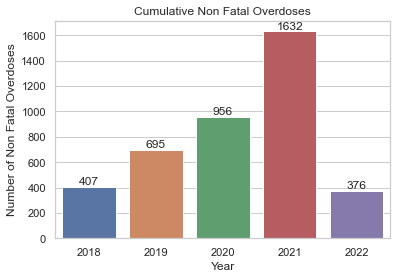

In [15]:
# Generate quarterly bar graph with groupby of each year

sns.set_theme(style="whitegrid")

ax = sns.barplot(
    x='year', y='suspected_non_fatal_overdoses',
    estimator=sum, ci=None,
    data=df_opioid
)

# Set x,y label
ax.set(xlabel='Year', ylabel='Number of Non Fatal Overdoses', title='Cumulative Non Fatal Overdoses')
ax.bar_label(ax.containers[0])

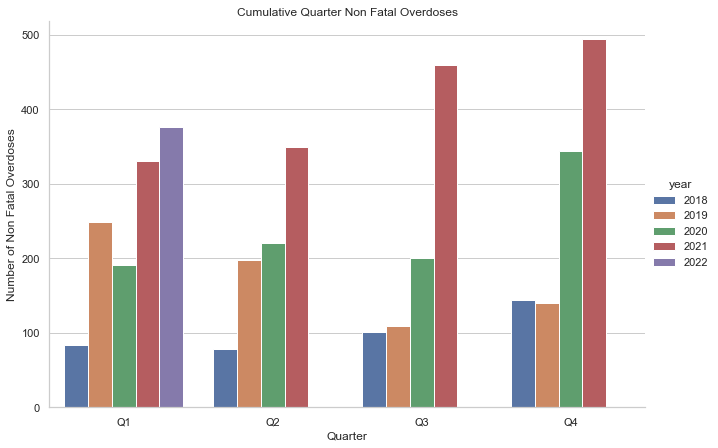

In [16]:
ax = sns.catplot(
    x='year_stage', y='suspected_non_fatal_overdoses', hue='year',
    estimator=sum, ci=None,
    height=6, aspect=1.5,
    data=df_opioid, kind='bar'
)

# Set x,y label
ax.set(xlabel='Quarter', ylabel='Number of Non Fatal Overdoses', title='Cumulative Quarter Non Fatal Overdoses')

[Text(0, 0, '376')]

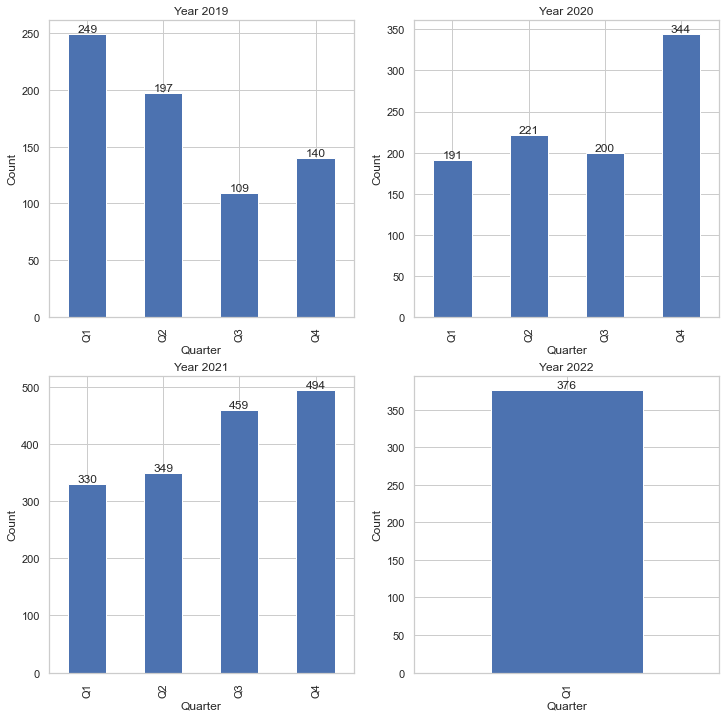

In [17]:
#Generate subplot of quarterly bar graph

fig, axs = plt.subplots(2,2, figsize=(12,12))

# Sum up quarterly counts of overdose in each year
od_2019 = quarterly_od(df_opioid, 2019)
od_2020 = quarterly_od(df_opioid, 2020)
od_2021 = quarterly_od(df_opioid, 2021)
od_2022 = quarterly_od(df_opioid, 2022)

# Generate bar graph of each year and their quarterly
p1 = bar_graph(od_2019, axs[0,0], 'Year 2019')
p2 = bar_graph(od_2020, axs[0,1], 'Year 2020')
p3 = bar_graph(od_2021, axs[1,0], 'Year 2021')
p4 = bar_graph(od_2022, axs[1,1], 'Year 2022')

# Display frequency counts beside bars on graph
p1.bar_label(p1.containers[0])
p2.bar_label(p2.containers[0])
p3.bar_label(p3.containers[0])
p4.bar_label(p4.containers[0])

[Text(0.5, 0, 'Number of Non Fatal Overdoses'),
 Text(0, 0.5, 'Location Name'),
 Text(0.5, 1.0, 'Top 5 Location with Overall Highest Non Fatal Overdoses')]

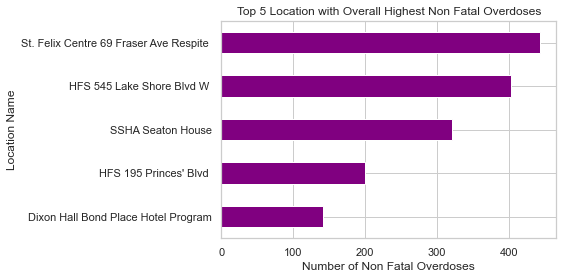

In [18]:
# Plot of top 5 location with total highest non fatal overdoses
ax = df_opioid.groupby(by='location_name').suspected_non_fatal_overdoses.sum().sort_values(ascending=False).head().plot.barh(color='purple')
ax.invert_yaxis()
ax.set(xlabel='Number of Non Fatal Overdoses', ylabel='Location Name', title='Top 5 Location with Overall Highest Non Fatal Overdoses')

[Text(0, 0, '51'),
 Text(0, 0, '38'),
 Text(0, 0, '28'),
 Text(0, 0, '22'),
 Text(0, 0, '21')]

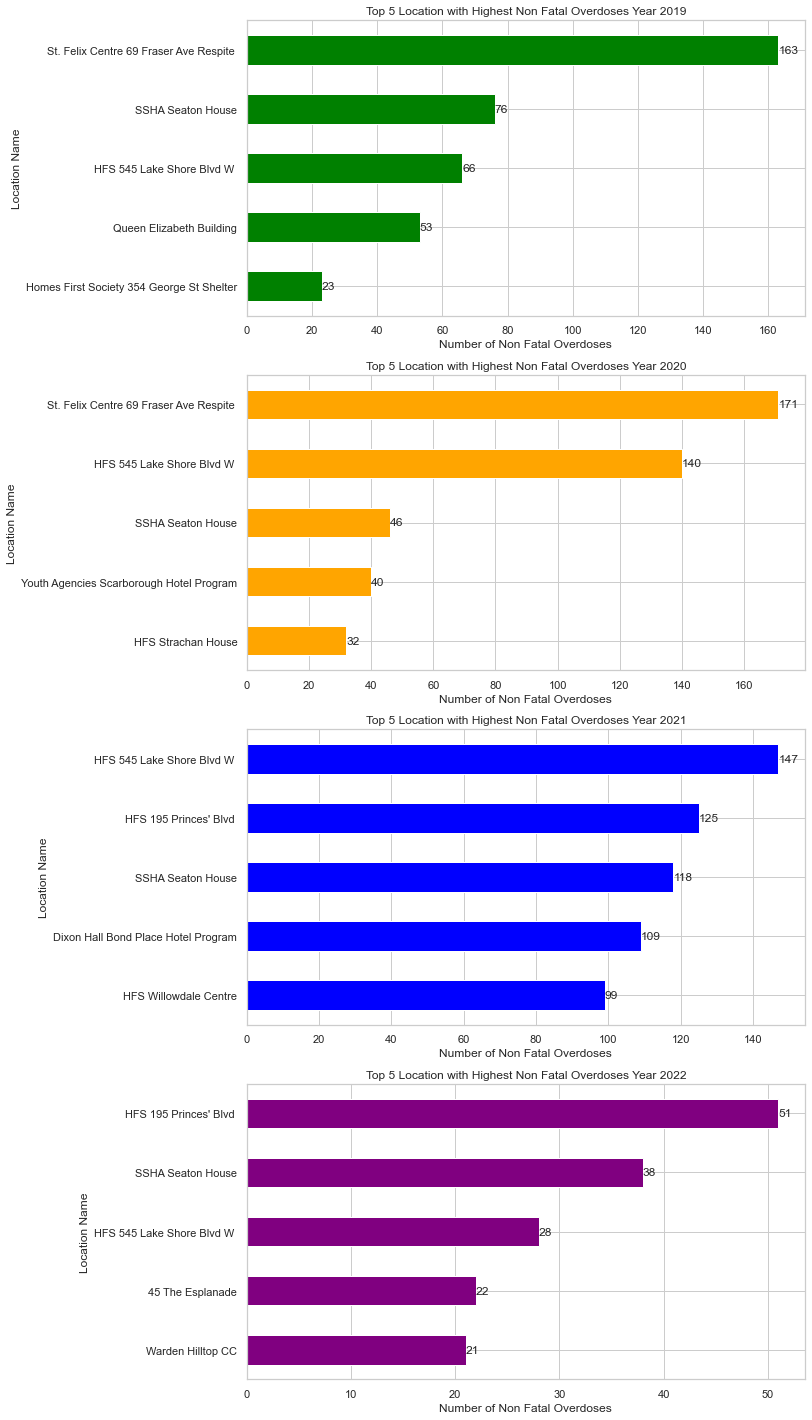

In [19]:
# Create subplots
fig, axs = plt.subplots(4,1, figsize=(10,25))

# Generate horizontal bar graph for top 5 highest overdose basedd on location
f1 = df_opioid.loc[df_opioid.year.isin([2019])].groupby(by='location_name').suspected_non_fatal_overdoses.sum().sort_values(ascending=False).head().plot.barh(color='green', ax=axs[0])
f2 = df_opioid.loc[df_opioid.year.isin([2020])].groupby(by='location_name').suspected_non_fatal_overdoses.sum().sort_values(ascending=False).head().plot.barh(color='orange', ax=axs[1])
f3 = df_opioid.loc[df_opioid.year.isin([2021])].groupby(by='location_name').suspected_non_fatal_overdoses.sum().sort_values(ascending=False).head().plot.barh(color='blue', ax=axs[2])
f4 = df_opioid.loc[df_opioid.year.isin([2022])].groupby(by='location_name').suspected_non_fatal_overdoses.sum().sort_values(ascending=False).head().plot.barh(color='purple', ax=axs[3])

# Invert graph axis; highest count on top and lowest count on bottom
f1.invert_yaxis()
f2.invert_yaxis()
f3.invert_yaxis()
f4.invert_yaxis()

# Set x,y label and title
f1.set(xlabel='Number of Non Fatal Overdoses', ylabel='Location Name', title='Top 5 Location with Highest Non Fatal Overdoses Year 2019')
f2.set(xlabel='Number of Non Fatal Overdoses', ylabel='Location Name', title='Top 5 Location with Highest Non Fatal Overdoses Year 2020')
f3.set(xlabel='Number of Non Fatal Overdoses', ylabel='Location Name', title='Top 5 Location with Highest Non Fatal Overdoses Year 2021')
f4.set(xlabel='Number of Non Fatal Overdoses', ylabel='Location Name', title='Top 5 Location with Highest Non Fatal Overdoses Year 2022')

# Display frequency counts beside bars on graph
f1.bar_label(f1.containers[0])
f2.bar_label(f2.containers[0])
f3.bar_label(f3.containers[0])
f4.bar_label(f4.containers[0])

In [20]:
# Selected shelters of interest
# ['69 Fraser Ave', '962 Bloor St W', '135 Sherbourne St', '45 The Esplanade']

Esplanade = select_location(df_opioid, '45 The Esplanade')
Fraser = select_location(df_opioid, '69 Fraser Ave')
Bloor = select_location(df_opioid, '962 Bloor St W')
Sherbourne = select_location(df_opioid, '135 Sherbourne St')

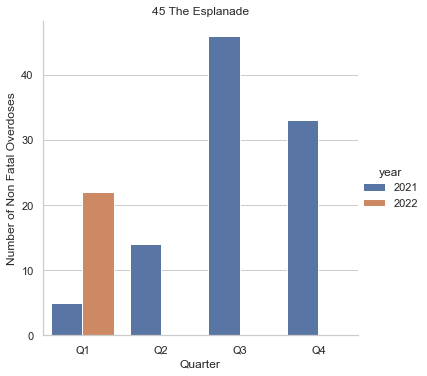

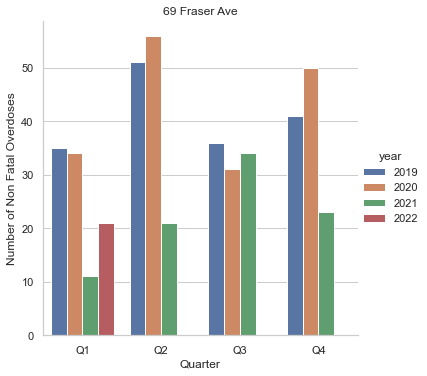

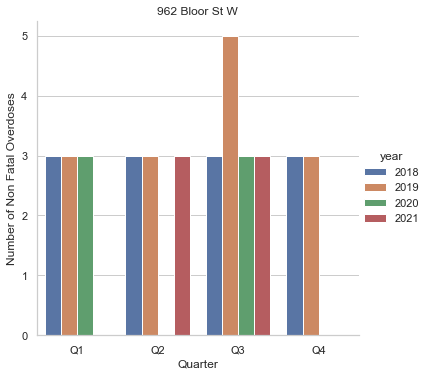

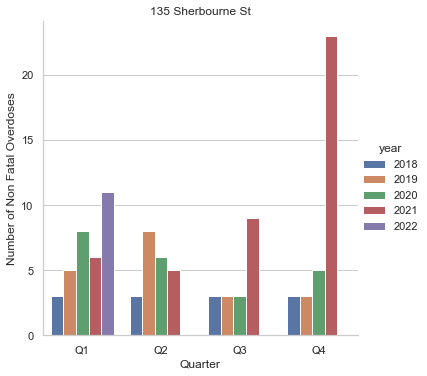

In [21]:
#
f1 = sns.catplot(x='year_stage',
            y='suspected_non_fatal_overdoses',
            hue='year',
            data=Esplanade, kind='bar')

f2 = sns.catplot(x='year_stage',
            y='suspected_non_fatal_overdoses',
            hue='year',
            data=Fraser, kind='bar')

f3 = sns.catplot(x='year_stage',
            y='suspected_non_fatal_overdoses',
            hue='year',
            data=Bloor, kind='bar')

f4 = sns.catplot(x='year_stage',
            y='suspected_non_fatal_overdoses',
            hue='year',
            data=Sherbourne, kind='bar')


# Set x,y label and title
f1.set(xlabel='Quarter', ylabel='Number of Non Fatal Overdoses', title='45 The Esplanade')
f2.set(xlabel='Quarter', ylabel='Number of Non Fatal Overdoses', title='69 Fraser Ave')
f3.set(xlabel='Quarter', ylabel='Number of Non Fatal Overdoses', title='962 Bloor St W')
f4.set(xlabel='Quarter', ylabel='Number of Non Fatal Overdoses', title='135 Sherbourne St')

# Display it on the screen
plt.show()
